# Problem
Detect breast cancer by applying a logistic regression model on a real-world dataset and predict whether a tumor is benign (not breast cancer) or malignant (breast cancer) based on its characteristics.

## Importing the libraries

In [1]:
import pandas as pd

## Importing the dataset

In [9]:
cancer_dataset = pd.read_csv('../Dataset/breast_cancer.csv')
cancer_dataset = cancer_dataset.dropna() # removing missing values
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


We want to predict the class based on other features. The Class value 2 is for benign, 4 for malignant

In [7]:
cancer_dataset['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [10]:
X = cancer_dataset.iloc[:, 1:-1].values
y = cancer_dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on the Training set

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

Accuracy: 0.96 


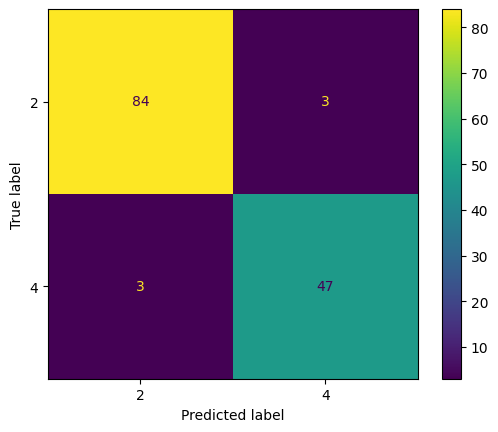

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
#print(cm)
print("Accuracy: {:.2f} ".format(accuracy_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

## Computing the accuracy with k-Fold Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %
